Importing Libraries


In [1]:
import pandas as pdl
import numpy as npi
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import LabelEncoder;
from sklearn.linear_model import LinearRegression;
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor;
from sklearn.ensemble import GradientBoostingRegressor;
from sklearn.ensemble import VotingRegressor;
from sklearn.metrics import r2_score;
from sklearn.tree import DecisionTreeRegressor;
import plotly.graph_objects as go ;
import statsmodels.api as apl;
import seaborn as sns;

Data Preprocessing , Model Building , Model training , Analyzing the model

SELECT CHOICE OF CURRENCY EXCHANGE RATE : 1.INR-USD   , 2.EUR-USD   ,3.CAD-USD
1
1305
(1305, 7)
Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
feature having na:-  []
numerical features are  ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'] count of numerical featuers are  6
categorical_feature are  ['Date'] count of categorical_feature are  1
descrete features are  ['Volume'] count of descrete_features are  1


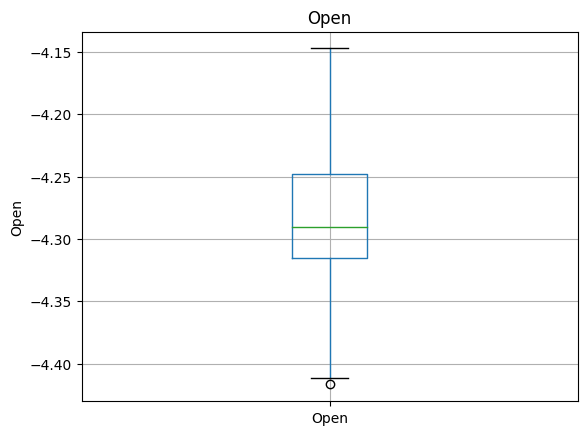

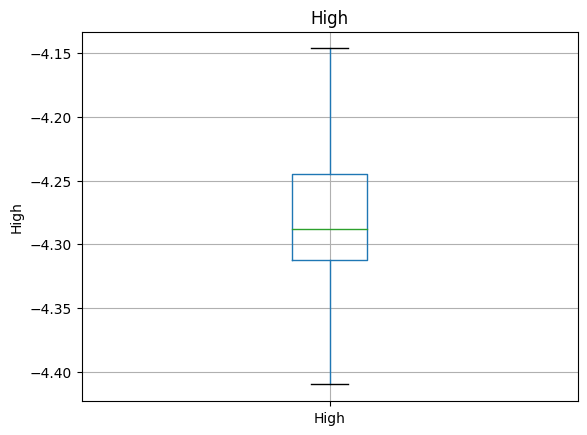

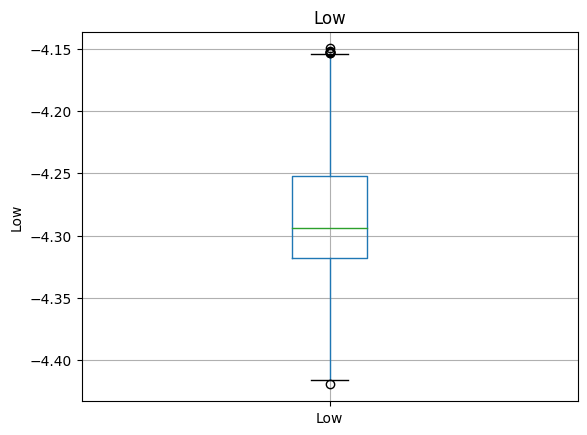

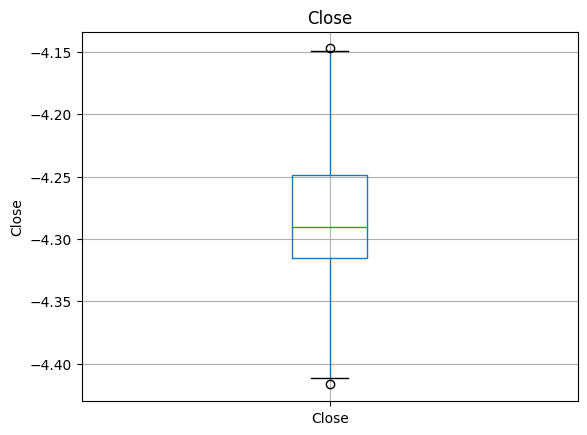

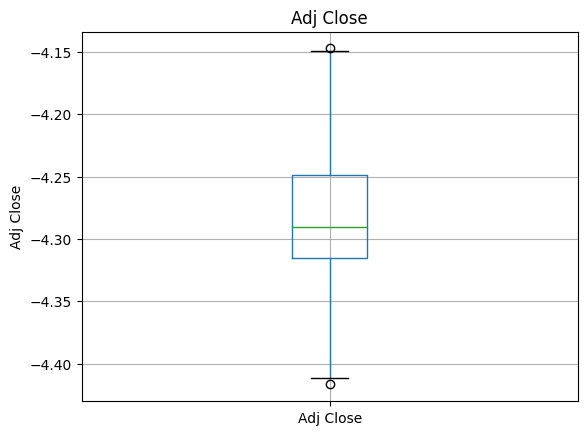

            Date      Open      High       Low     Close  Adj Close  Volume
0     13-10-2017  0.015373  0.015468  0.015373  0.015374   0.015374     0.0
1     16-10-2017  0.015458  0.015464  0.015440  0.015462   0.015462     0.0
2     17-10-2017  0.015458  0.015458  0.015375  0.015457   0.015457     0.0
3     18-10-2017  0.015379  0.015410  0.015348  0.015402   0.015402     0.0
4     19-10-2017  0.015374  0.015399  0.015357  0.015375   0.015375     0.0
...          ...       ...       ...       ...       ...        ...     ...
1300  07-10-2022  0.012143  0.012188  0.012103  0.012143   0.012143     0.0
1301  10-10-2022  0.012073  0.012157  0.012039  0.012073   0.012073     0.0
1302  11-10-2022  0.012133  0.012175  0.012085  0.012133   0.012133     0.0
1303  12-10-2022  0.012155  0.012172  0.012104  0.012155   0.012155     0.0
1304  13-10-2022  0.012166  0.012166  0.012134  0.012138   0.012138     0.0

[1305 rows x 7 columns]
          Open      High       Low
0     0.015373  0.015468  0.

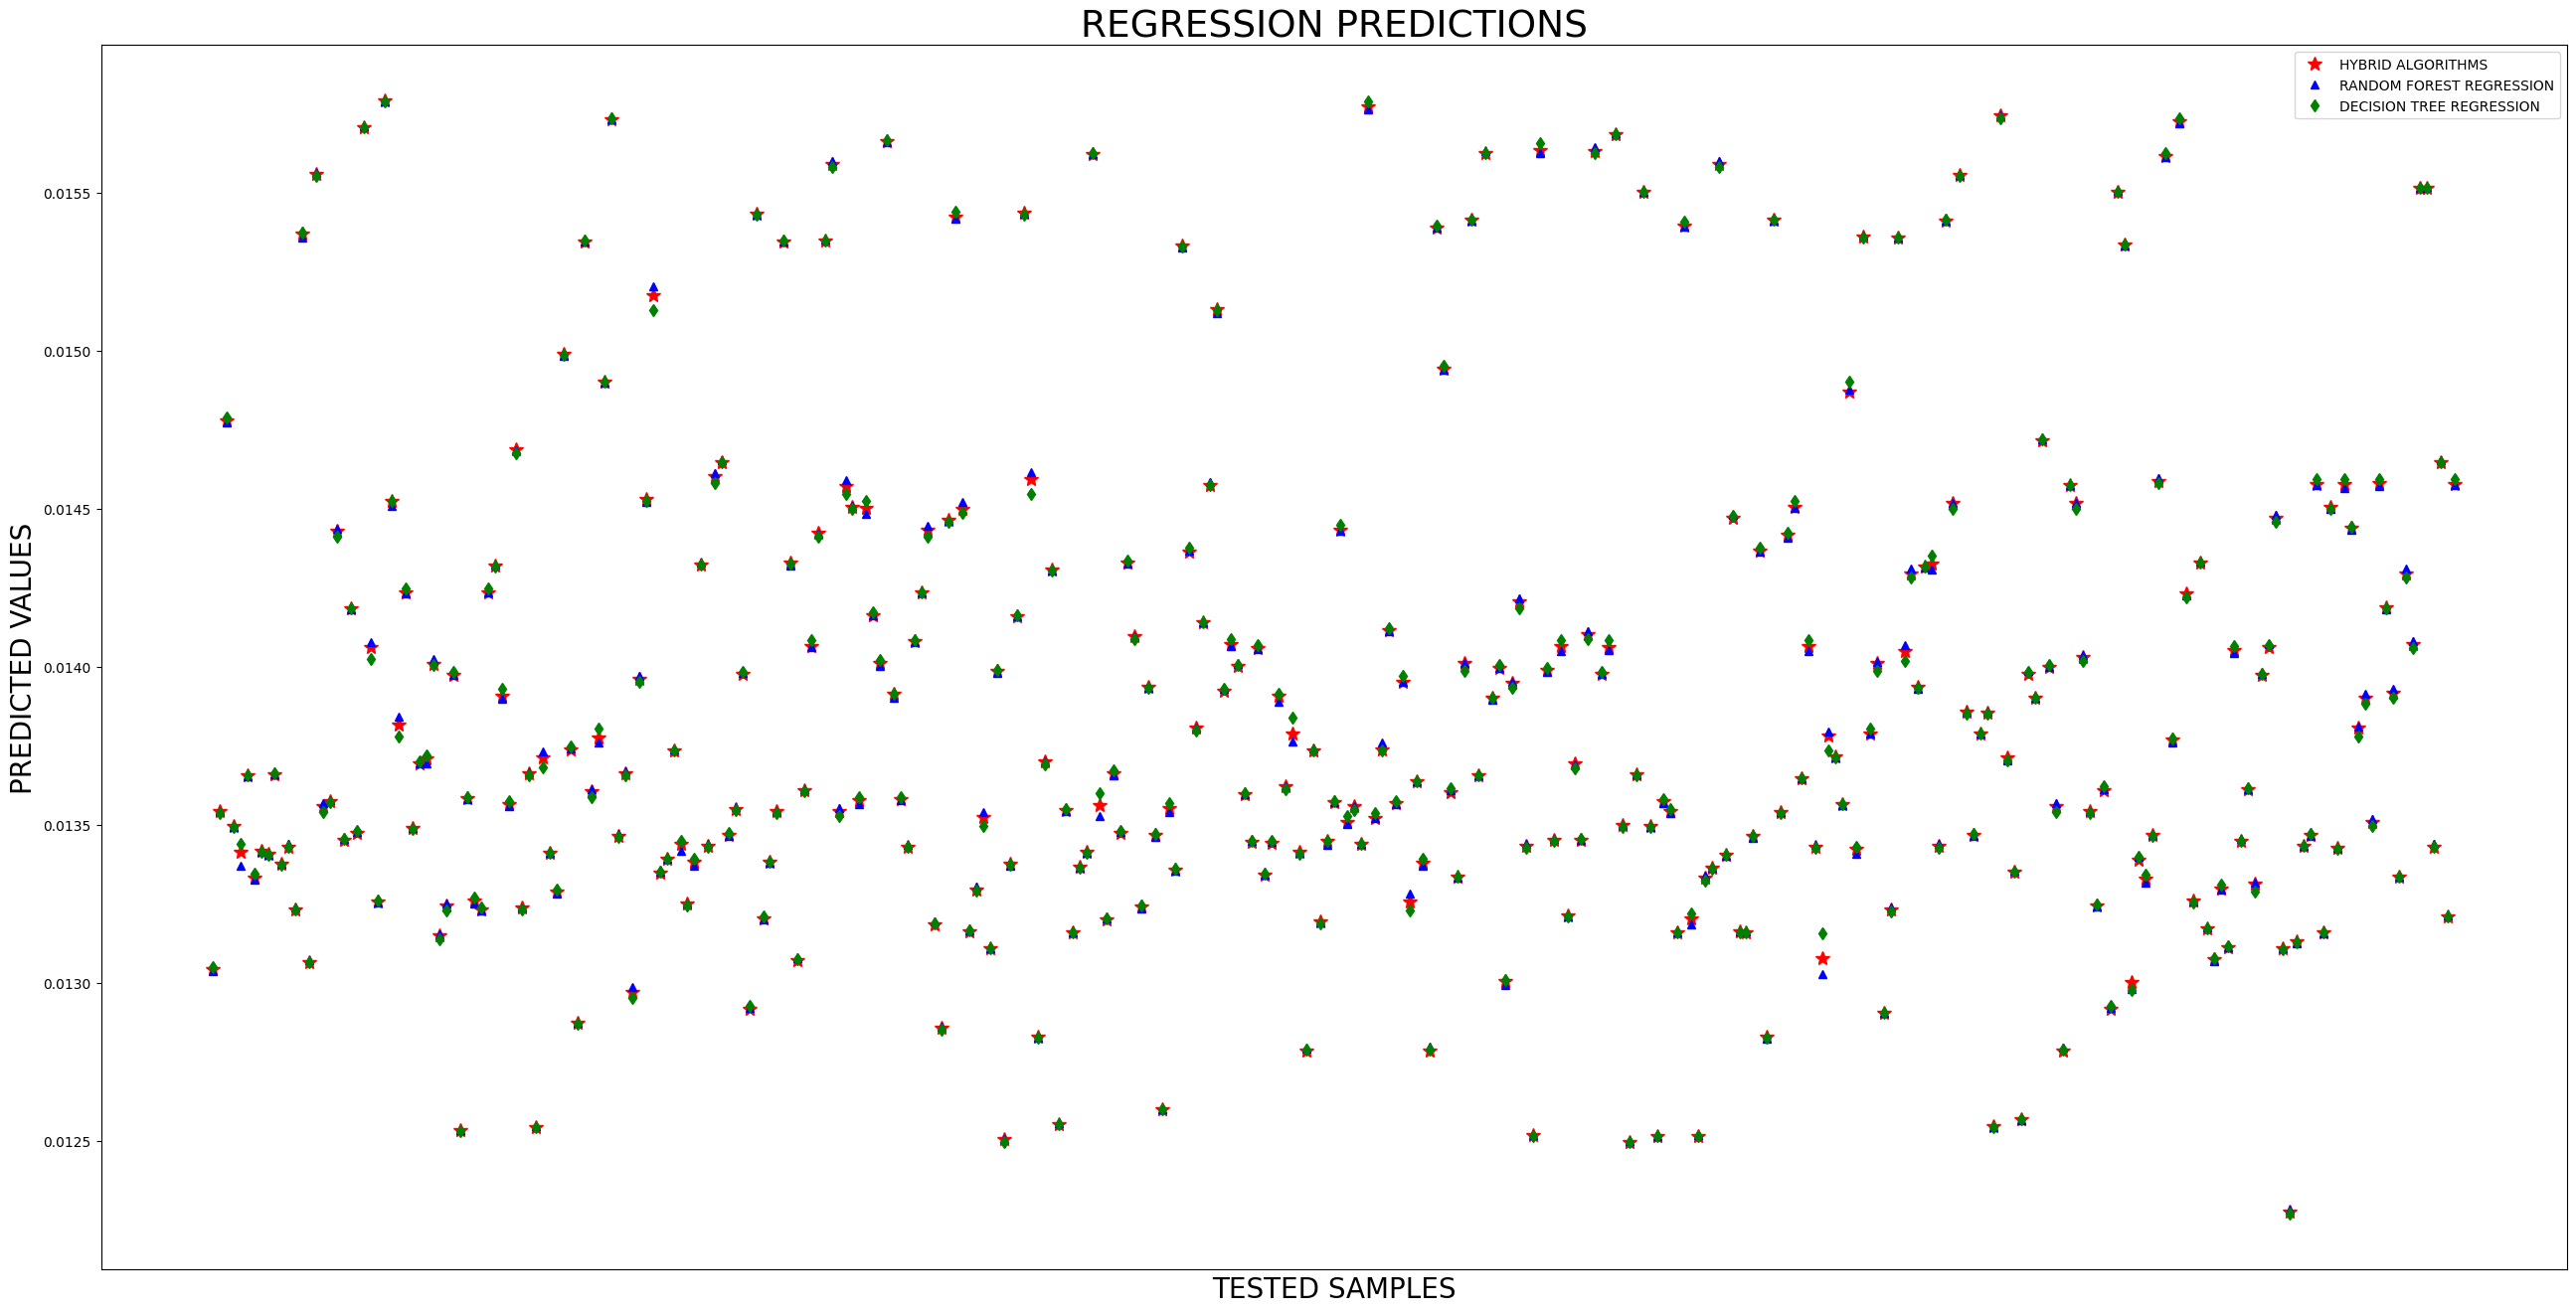

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.835e+05
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        10:28:49   Log-Likelihood:                 8934.6
No. Observations:                 978   AIC:                        -1.786e+04
Df Residuals:                     974   BIC:                        -1.784e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.175e-05   1.52e-05      2.748      0.0

In [8]:
print("SELECT CHOICE OF CURRENCY EXCHANGE RATE : 1.INR-USD   , 2.EUR-USD   ,3.CAD-USD");
i = int(input());
if(i==1):
    dfl=pdl.read_csv("INRUS.csv");
    dfl.head()
    print(len(dfl));
    print(dfl.shape);
    print(dfl.isnull().sum());



    dfl['Open']=dfl['Open'].fillna(dfl['Open'].mean());
    dfl['High']=dfl['High'].fillna(dfl['High'].mean());
    dfl['Low']=dfl['Low'].fillna(dfl['Low'].mean());
    dfl['Close']=dfl['Close'].fillna(dfl['Close'].mean());
    dfl['Adj Close'] = dfl['Adj Close'].fillna(dfl['Adj Close'].mean());
    dfl['Volume']=dfl['Volume'].fillna(dfl['Volume'].mean());
    print(dfl.isnull().sum());
    feature_having_na = [feature for feature in dfl.columns if dfl[feature].isnull().sum()>1]
    print('feature having na:- ', feature_having_na);
    numerical_feature = [feature for feature  in dfl.columns if dfl[feature].dtypes !='O' ]
    print('numerical features are ', numerical_feature, 'count of numerical featuers are ', len(numerical_feature))


    categorical_feature = list(set(dfl.columns)-set(numerical_feature))
    print('categorical_feature are ', categorical_feature, 'count of categorical_feature are ', len(categorical_feature))

    descrete_features = [feature for feature in numerical_feature if len(dfl[feature].unique())<25]
    print('descrete features are ', descrete_features, 'count of descrete_features are ', len(descrete_features))

    for feature in numerical_feature:
      data = dfl.copy()
      if 0 in data[feature].unique():
        pass
      else:
        data[feature] = npi.log(data[feature])
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

    print(dfl);
    x= dfl[['Open','High','Low']];
    q= dfl["Close"];
    print(x);
    print(q);
    x_train,x_test,q_train,q_test=train_test_split(x,q,test_size=0.25,random_state=1,shuffle=True);
    print(x_train);
    linear=LinearRegression()
    linear.fit(x_train,q_train);
    lin_pre=linear.predict(x_test);
    lin_prs=linear.predict(x_train);
    print();
    print("MULTIPLE LINEAR REGRESSION PREDICTION")
    print(lin_pre);
    print(r2_score(q_test,lin_pre));
    randomforestregression = RandomForestRegressor(n_estimators=10,random_state=0)
    randomforestregression.fit(x_train,q_train);
    forest_pre=randomforestregression.predict(x_test);
    print();
    print("RANDOM FOREST REGRESSION PREDICTION")
    print(forest_pre);
    print(r2_score(q_test,forest_pre));
    decision_regression = DecisionTreeRegressor(random_state=0,min_samples_leaf=2)
    decision_regression.fit(x_train,q_train)
    decision_pre=decision_regression.predict(x_test);
    print();
    print("DECISION TREE REGRESSION PREDICTION")
    print(decision_pre);
    print(r2_score(q_test,decision_pre));
    Gradient=GradientBoostingRegressor()
    Gradient.fit(x_train,q_train);
    gra_pre=Gradient.predict(x_test);
    print();
    print("GRADIENT BOOSTING REGRESSOR ALGORITHM PREDICTION\n",gra_pre);
    print(r2_score(q_test,gra_pre));
    vot = VotingRegressor([('rf',randomforestregression),('df',decision_regression),('gb',Gradient)]);
    vot.fit(x_train,q_train);
    pre=vot.predict(x_test);
    print();
    print("HYBRID MACHINE LEARNING ALGORITHM PREDICTION\n ",pre);
    print(r2_score(q_test,pre));
    print();
    print("Linear Intercept =",linear.intercept_);
    x_train_Sm= apl.add_constant(x_train)
    x_train_Sm= apl.add_constant(x_train)
    ls=apl.OLS(q_train,x_train_Sm).fit()
    plt.figure(figsize=(32,16));
    plt.plot(pre,'r*',ms=10,label='HYBRID ALGORITHMS');
    plt.plot(forest_pre,'b^',label='RANDOM FOREST REGRESSION');
    plt.plot(decision_pre,'gd',label='DECISION TREE REGRESSION');
    plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
    plt.title("REGRESSION PREDICTIONS",fontsize=27);
    plt.xlabel("TESTED SAMPLES",fontsize=20);
    plt.ylabel("PREDICTED VALUES",fontsize=20);
    plt.legend(loc='best')
    plt.show()

    print(ls.summary())
elif(i==2):
    dfl=pdl.read_csv("EURUS.csv");
    dfl.head()
    print(len(dfl));
    print(dfl.shape);
    print(dfl.isnull().sum());

    dfl['Open']=dfl['Open'].fillna(dfl['Open'].mean());
    dfl['High']=dfl['High'].fillna(dfl['High'].mean());
    dfl['Low']=dfl['Low'].fillna(dfl['Low'].mean());
    dfl['Close']=dfl['Close'].fillna(dfl['Close'].mean());
    dfl['Adj Close'] = dfl['Adj Close'].fillna(dfl['Adj Close'].mean());
    dfl['Volume']=dfl['Volume'].fillna(dfl['Volume'].mean());
    print(dfl.isnull().sum());
    feature_having_na = [feature for feature in dfl.columns if dfl[feature].isnull().sum()>1]
    print('feature having na:- ', feature_having_na);
    numerical_feature = [feature for feature  in dfl.columns if dfl[feature].dtypes !='O' ]
    print('numerical features are ', numerical_feature, 'count of numerical featuers are ', len(numerical_feature))


    categorical_feature = list(set(dfl.columns)-set(numerical_feature))
    print('categorical_feature are ', categorical_feature, 'count of categorical_feature are ', len(categorical_feature))

    descrete_features = [feature for feature in numerical_feature if len(dfl[feature].unique())<25]
    print('descrete features are ', descrete_features, 'count of descrete_features are ', len(descrete_features))

    for feature in numerical_feature:
      data = dfl.copy()
      if 0 in data[feature].unique():
        pass
      else:
        data[feature] = npi.log(data[feature])
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

    print(dfl);

    x= dfl[['Open','High','Low']];
    q= dfl["Close"];
    print(x);
    print(q);
    x_train,x_test,q_train,q_test=train_test_split(x,q,test_size=0.25,random_state=0,shuffle=True);
    print(x_train);
    linear=LinearRegression()
    linear.fit(x_train,q_train);
    lin_pre=linear.predict(x_test);
    lin_prs=linear.predict(x_train);
    print();
    print("MULTIPLE LINEAR REGRESSION PREDICTION");
    print(lin_pre);
    print(r2_score(q_test,lin_pre));
    randomforestregression = RandomForestRegressor(n_estimators=10,random_state=0)
    randomforestregression.fit(x_train,q_train);
    forest_pre=randomforestregression.predict(x_test);
    print();
    print("RANDOM FOREST REGRESSION PREDICTION")
    print(forest_pre);
    print(r2_score(q_test,forest_pre));
    decision_regression = DecisionTreeRegressor()
    decision_regression.fit(x_train,q_train)
    decision_pre=decision_regression.predict(x_test);
    print();
    print("DECISION TREE REGRESSION PREDICTION")
    print(decision_pre);
    print(r2_score(q_test,decision_pre));
    Gradient=GradientBoostingRegressor()
    Gradient.fit(x_train,q_train);
    gra_pre=Gradient.predict(x_test);
    print();
    print("GRADIENT BOOSTING REGRESSOR ALGORITHM PREDICTION\n",gra_pre);
    print(r2_score(q_test,gra_pre));
    vot = VotingRegressor([('rf',randomforestregression),('df',decision_regression),('gb',Gradient)]);
    vot.fit(x_train,q_train);
    pre=vot.predict(x_test);
    print();
    print("HYBRID MACHINE LEARNING ALGORITHM PREDICTION\n ",pre);
    print(r2_score(q_test,pre));
    print();
    print("Linear Intercept =",linear.intercept_);

    x_train_Sm= apl.add_constant(x_train)
    x_train_Sm= apl.add_constant(x_train)
    ls=apl.OLS(q_train,x_train_Sm).fit()
    plt.figure(figsize=(32,16));
    plt.plot(pre,'r*',ms=10,label='HYBRID ALGORITHMS');
    plt.plot(forest_pre,'b^',label='RANDOM FOREST REGRESSION');
    plt.plot(decision_pre,'gd',label='DECISION TREE REGRESSION');
    plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False);
    plt.title("REGRESSION PREDICTIONS",fontsize=27);
    plt.xlabel("TESTED SAMPLES",fontsize=20);
    plt.ylabel("PREDICTED VALUES",fontsize=20);
    plt.legend(loc='best')

    plt.show()

    print(ls.summary())
else:
    dfl=pdl.read_csv("CADUS.csv");
    dfl.head()
    print(len(dfl));
    print(dfl.shape);
    print(dfl.isnull().sum());

    dfl['Open']=dfl['Open'].fillna(dfl['Open'].mean());
    dfl['High']=dfl['High'].fillna(dfl['High'].mean());
    dfl['Low']=dfl['Low'].fillna(dfl['Low'].mean());
    dfl['Close']=dfl['Close'].fillna(dfl['Close'].mean());
    dfl['Adj Close'] = dfl['Adj Close'].fillna(dfl['Adj Close'].mean());
    dfl['Volume']=dfl['Volume'].fillna(dfl['Volume'].mean());
    print(dfl.isnull().sum());
    feature_having_na = [feature for feature in dfl.columns if dfl[feature].isnull().sum()>1]
    print('feature having na:- ', feature_having_na);
    numerical_feature = [feature for feature  in dfl.columns if dfl[feature].dtypes !='O' ]
    print('numerical features are ', numerical_feature, 'count of numerical featuers are ', len(numerical_feature))


    categorical_feature = list(set(dfl.columns)-set(numerical_feature))
    print('categorical_feature are ', categorical_feature, 'count of categorical_feature are ', len(categorical_feature))

    descrete_features = [feature for feature in numerical_feature if len(dfl[feature].unique())<25]
    print('descrete features are ', descrete_features, 'count of descrete_features are ', len(descrete_features))

    for feature in numerical_feature:
      data = dfl.copy()
      if 0 in data[feature].unique():
        pass
      else:
        data[feature] = npi.log(data[feature])
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

    print(dfl);


    x= dfl[['Open','High','Low']];
    q= dfl["Close"];
    print(x);
    print(q);
    x_train,x_test,q_train,q_test=train_test_split(x,q,test_size=0.25,random_state=0,shuffle=True);
    print(x_train);
    linear=LinearRegression()
    linear.fit(x_train,q_train);
    lin_pre=linear.predict(x_test);
    lin_prs=linear.predict(x_train);
    print();
    print("MULTIPLE LINEAR REGRESSION PREDICTION");
    print(lin_pre);
    print(r2_score(q_test,lin_pre));
    randomforestregression = RandomForestRegressor(n_estimators=10,random_state=0)
    randomforestregression.fit(x_train,q_train);
    forest_pre=randomforestregression.predict(x_test);
    print();
    print("RANDOM FOREST REGRESSION PREDICTION");
    print(forest_pre);
    print(r2_score(q_test,forest_pre));
    decision_regression = DecisionTreeRegressor()
    decision_regression.fit(x_train,q_train)
    decision_pre=decision_regression.predict(x_test);
    print();
    print("DECISION TREE REGRESSION PREDICTION");
    print(decision_pre);
    print(r2_score(q_test,decision_pre));
    Gradient=GradientBoostingRegressor()
    Gradient.fit(x_train,q_train);
    gra_pre=Gradient.predict(x_test);
    print();
    print("GRADIENT BOOSTING REGRESSOR ALGORITHM PREDICTION\n",gra_pre);
    print(r2_score(q_test,gra_pre));
    vot = VotingRegressor([('rf',randomforestregression),('df',decision_regression),('gb',Gradient)]);
    vot.fit(x_train,q_train);
    pre=vot.predict(x_test);
    print();
    print("HYBRID MACHINE LEARNING ALGORITHM PREDICTION\n ",pre);
    print(r2_score(q_test,pre));
    print();
    print("Linear Intercept =",linear.intercept_);

    x_train_Sm= apl.add_constant(x_train)
    x_train_Sm= apl.add_constant(x_train)
    ls=apl.OLS(q_train,x_train_Sm).fit()
    plt.figure(figsize=(32,16));
    plt.plot(pre,'r*',ms=10,label='HYBRID ALGORITHMS');
    plt.plot(forest_pre,'b^',label='RANDOM FOREST REGRESSION');
    plt.plot(decision_pre,'gd',label='DECISION TREE REGRESSION');
    plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
    plt.title("REGRESSION PREDICTIONS",fontsize=27);
    plt.xlabel("TESTED SAMPLES",fontsize=20);
    plt.ylabel("PREDICTED VALUES",fontsize=20);
    plt.legend(loc='best')
    plt.show()

    print(ls.summary())

